In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.datasets import reuters 
import numpy as np
import matplotlib.pyplot as plt
import pickle

2023-12-19 01:35:34.641865: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 01:35:34.664566: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 01:35:34.664606: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 01:35:34.664629: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 01:35:34.669648: I tensorflow/core/platform/cpu_feature_g

**Globals**

In [3]:
#Globals
NUM_EPOCHS = 60
seeds = [41,42,64,72,122]   
LIST_of_model_histories = []

In [4]:
seed_index = 4
seed = seeds[seed_index]

In [5]:
# Reuters veri kümesini yükleme

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

# Padding işlemi (Haberlerin uzunluğunu eşitlemek için)
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Etiketleri kategorik forma dönüştürme
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

In [6]:
# Veri kümesini bölme
x_common_train = x_train[:500]
y_common_train = y_train[:500]

x_m1_train = x_train[500:1000]
y_m1_train = y_train[500:1000]

x_m2_train = x_train[1000:1500]
y_m2_train = y_train[1000:1500]



** Model Save & Load **

In [7]:
def save_model_history(history, model_type):
    filename = "Text_Model_histories/" + model_type + "_seed_" + str(seed) + "_epoch_" + str(NUM_EPOCHS) + ".pkl"
    with open(filename, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
        
def load_model_history(model_type, seed, epoch):
    filename = "Text_Model_histories/" + model_type + "_seed_" + str(seed) + "_epoch_" + str(NUM_EPOCHS) + ".pkl"
    with open(filename, 'rb') as file_pi:
        history = pickle.load(file_pi)
    return history

In [8]:
# Modeli tanımlama
def create_model():
    model = Sequential()
    # Embedding katmanı: Kelime gömme vektörlerini oluşturur
    model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))

    # LSTM katmanı: Uzun süreli bağlamları yakalamaya yardımcı olur
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128))

    # Dense katmanları: Sınıflandırma için
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(46, activation='softmax'))  # Reuters veri kümesinde 46 sınıf var

    # Modeli derleme
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model



Calculatin W0

In [9]:
# Ortak modeli eğitme
common_model = create_model()
history=common_model.fit(x_common_train, y_common_train, epochs=NUM_EPOCHS)
save_model_history(history, "M0")


2023-12-19 01:35:37.858923: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-19 01:35:37.858948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: aag
2023-12-19 01:35:37.858950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: aag
2023-12-19 01:35:37.859037: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 545.23.8
2023-12-19 01:35:37.859046: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 545.23.8
2023-12-19 01:35:37.859048: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 545.23.8


Epoch 1/60
16/16 [==============================] - 4s 158ms/step - loss: 3.3245 - accuracy: 0.3240
Epoch 2/60
16/16 [==============================] - 2s 139ms/step - loss: 2.5219 - accuracy: 0.3320
Epoch 3/60
16/16 [==============================] - 2s 134ms/step - loss: 2.4229 - accuracy: 0.3340
Epoch 4/60
16/16 [==============================] - 2s 157ms/step - loss: 2.4103 - accuracy: 0.2880
Epoch 5/60
16/16 [==============================] - 2s 148ms/step - loss: 2.3786 - accuracy: 0.3340
Epoch 6/60
16/16 [==============================] - 2s 132ms/step - loss: 2.3917 - accuracy: 0.3460
Epoch 7/60
16/16 [==============================] - 2s 136ms/step - loss: 2.3782 - accuracy: 0.3260
Epoch 8/60
16/16 [==============================] - 2s 154ms/step - loss: 2.4217 - accuracy: 0.3120
Epoch 9/60
16/16 [==============================] - 2s 128ms/step - loss: 2.3630 - accuracy: 0.3420
Epoch 10/60
16/16 [==============================] - 2s 140ms/step - loss: 2.3771 - accuracy: 0.3360

Calculating W1

In [10]:
# M1 ve M2 modelleri için klonlama ve eğitim
m1_model = tf.keras.models.clone_model(common_model)
m1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m1_model.set_weights(common_model.get_weights())
history = m1_model.fit(x_m1_train, y_m1_train, epochs=NUM_EPOCHS)
save_model_history(history, "M1")

Epoch 1/60
16/16 [==============================] - 4s 145ms/step - loss: 3.8601 - accuracy: 0.4800
Epoch 2/60
16/16 [==============================] - 2s 136ms/step - loss: 2.2495 - accuracy: 0.4800
Epoch 3/60
16/16 [==============================] - 2s 142ms/step - loss: 1.8917 - accuracy: 0.5360
Epoch 4/60
16/16 [==============================] - 2s 144ms/step - loss: 1.6750 - accuracy: 0.5640
Epoch 5/60
16/16 [==============================] - 2s 142ms/step - loss: 1.5601 - accuracy: 0.6020
Epoch 6/60
16/16 [==============================] - 2s 139ms/step - loss: 1.4464 - accuracy: 0.6160
Epoch 7/60
16/16 [==============================] - 2s 148ms/step - loss: 1.3625 - accuracy: 0.6520
Epoch 8/60
16/16 [==============================] - 2s 144ms/step - loss: 1.2683 - accuracy: 0.6800
Epoch 9/60
16/16 [==============================] - 2s 145ms/step - loss: 1.2455 - accuracy: 0.6760
Epoch 10/60
16/16 [==============================] - 2s 147ms/step - loss: 1.1701 - accuracy: 0.6960

Calculating W2

In [11]:

m2_model = tf.keras.models.clone_model(common_model)
m2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m2_model.set_weights(common_model.get_weights())
history=m2_model.fit(x_m2_train, y_m2_train, epochs=NUM_EPOCHS)
save_model_history(history, "M2")

Epoch 1/60
16/16 [==============================] - 4s 154ms/step - loss: 3.9178 - accuracy: 0.4880
Epoch 2/60
16/16 [==============================] - 3s 154ms/step - loss: 2.1961 - accuracy: 0.5020
Epoch 3/60
16/16 [==============================] - 2s 142ms/step - loss: 1.9093 - accuracy: 0.5440
Epoch 4/60
16/16 [==============================] - 2s 143ms/step - loss: 1.7428 - accuracy: 0.6040
Epoch 5/60
16/16 [==============================] - 2s 149ms/step - loss: 1.6379 - accuracy: 0.6120
Epoch 6/60
16/16 [==============================] - 2s 142ms/step - loss: 1.5475 - accuracy: 0.6240
Epoch 7/60
16/16 [==============================] - 2s 142ms/step - loss: 1.7374 - accuracy: 0.5500
Epoch 8/60
16/16 [==============================] - 2s 138ms/step - loss: 1.4980 - accuracy: 0.6260
Epoch 9/60
16/16 [==============================] - 2s 137ms/step - loss: 1.3960 - accuracy: 0.6440
Epoch 10/60
16/16 [==============================] - 2s 146ms/step - loss: 1.3110 - accuracy: 0.6620

In [12]:
# Ağırlıkları kaydetme
weights_w1 = m1_model.get_weights()
weights_w2 = m2_model.get_weights()
weights_wi = common_model.get_weights()

In [13]:
# Adım 3: Arama Kümesi Performansı
# Arama kümesini belirleme (örneğin, x_train ve y_train'in bir kısmı)
x_val = x_train[1500:1600]
y_val = y_train[1500:1600]

In [14]:
# w1 ve w2 arasındaki çizgi üzerindeki modellerin performansını değerlendirme
best_val_acc = 0
best_weights = None
list_of_val_acc = []
list_of_alphas = []
for alpha in np.linspace(0, 1, 100):
    mixed_weights = [alpha * w1 + (1 - alpha) * w2 for w1, w2 in zip(weights_w1, weights_w2)]
    test_model = create_model()
    test_model.set_weights(mixed_weights)
    test_data = test_model.evaluate(x_val, y_val)
    val_loss, val_acc = test_data
    list_of_val_acc.append(val_acc)
    list_of_alphas.append(alpha)
    if val_acc > best_val_acc:
        best_alpha = alpha
        best_val_acc = val_acc
        best_weights = mixed_weights
        w_L = best_weights

#save list_of_val_acc to txt.file
filename = "Image_Model_histories/W1_W2_seed_" + str(seed) + "_epoch_" + str(NUM_EPOCHS) + ".pkl"
with open(filename, 'wb') as file_pi:
    pickle.dump(list_of_val_acc, file_pi)

4/4 [==============================] - 1s 100ms/step - loss: 4.4743 - accuracy: 0.5500


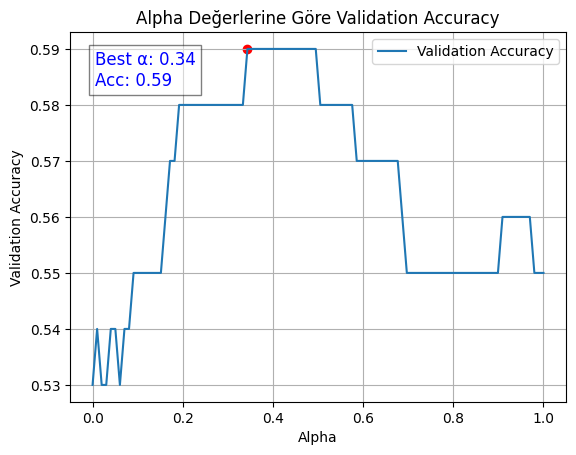

In [15]:
plt.plot(list_of_alphas, list_of_val_acc, label='Validation Accuracy')
plt.scatter([best_alpha], [best_val_acc], color='red')  # En iyi değeri işaretleme
plt.text(0.05, 0.95, f'Best α: {best_alpha:.2f}\nAcc: {best_val_acc:.2f}', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.title('Alpha Değerlerine Göre Validation Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('Plots/'+"Text_"+str(seed)+'_w1_w2_interpolation_accuracy.png')
plt.show()

In [16]:
print("Best alpha: ", best_alpha, "Best val acc: ", best_val_acc, "\nBest weights: ", best_weights)

Best alpha:  0.3434343434343435 Best val acc:  0.5899999737739563 
Best weights:  [array([[-0.01779249, -0.07168923, -0.01596438, ...,  0.01568087,
         0.03190714, -0.08801179],
       [ 0.09758396, -0.00121113,  0.04582462, ..., -0.03598592,
         0.02084043, -0.05512895],
       [ 0.00148047,  0.04760685, -0.01645326, ..., -0.00558584,
        -0.03184464,  0.06505773],
       ...,
       [-0.02282224,  0.01748543,  0.02986853, ...,  0.01762357,
        -0.0035383 , -0.03159878],
       [ 0.00177862,  0.01329118,  0.0324288 , ...,  0.04735715,
         0.04991113,  0.04903001],
       [ 0.00815995,  0.04617003,  0.03844988, ..., -0.01186766,
        -0.02194124,  0.03350409]], dtype=float32), array([[-0.05227076, -0.03231825,  0.08595172, ..., -0.19092327,
        -0.1756719 , -0.14465505],
       [-0.05376977,  0.00801535,  0.02784186, ...,  0.2241872 ,
         0.0453327 , -0.18964376],
       [-0.02914099,  0.02297092,  0.04950558, ..., -0.12710245,
        -0.1584687 , -0

In [17]:
num_samples = 14

In [18]:
# w_U için ağırlık kombinasyonlarını test etme
best_val_acc_u = 0
best_weights_u = None
list_of_val_acc_u = []
barycentric_points = []
for i in range(num_samples + 1):
    for j in range(num_samples - i + 1):
        alpha = i / num_samples
        beta = j / num_samples
        gamma = 1 - alpha - beta

        mixed_weights_u = [alpha * w + beta * w1 + gamma * w2 for w, w1, w2 in zip(weights_wi, weights_w1, weights_w2)]

        test_model_u = create_model()
        test_model_u.set_weights(mixed_weights_u)

        val_loss_u, val_acc_u = test_model_u.evaluate(x_val, y_val)
        list_of_val_acc_u.append(val_acc_u)
        barycentric_points.append([alpha, beta, gamma])

        if val_acc_u > best_val_acc_u:
            best_alpha_u, best_beta_u = alpha, beta
            best_val_acc_u = val_acc_u
            best_weights_u = mixed_weights_u
            w_U = best_weights_u

4/4 [==============================] - 1s 93ms/step - loss: 4.2549 - accuracy: 0.4800


In [19]:
len(list_of_val_acc_u)

120

Best alpha:  0.0 Best beta: 0.35714285714285715 Best val acc:  0.5899999737739563


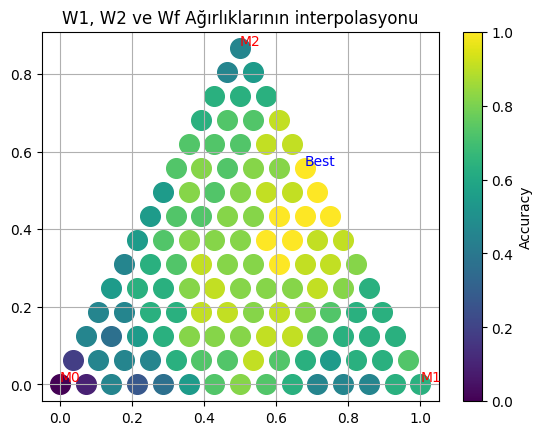

In [20]:
print("Best alpha: ", best_alpha_u, "Best beta:", best_beta_u, "Best val acc: ", best_val_acc_u)

x1, y1 = 0, 0 
x2, y2 = 1, 0
x3, y3 = 0.5, np.sqrt(0.75)

min_val_acc_u = np.min(list_of_val_acc_u)
max_val_acc_u = np.max(list_of_val_acc_u)
differece = np.max(list_of_val_acc_u) - min_val_acc_u
list_of_val_acc_u = [(val_acc - np.min(list_of_val_acc_u)) / differece for val_acc in list_of_val_acc_u]

for (alpa, beta, gamma), val_acc in zip(barycentric_points, list_of_val_acc_u):
    x = alpha * x1 + beta * x2 + gamma * x3
    y = alpha * y1 + beta * y2 + gamma * y3
    
    color = plt.cm.viridis(val_acc)
    plt.scatter(x, y, color=color,s=200)

plt.text(x1, y1, f'M0', verticalalignment='bottom', color='red')
plt.text(x2, y2, f'M1', verticalalignment='bottom', color='red')
plt.text(x3, y3, f'M2', verticalalignment='bottom', color='red')

plt.text(best_alpha_u * x1 +
        best_beta_u * x2 +
        (1-best_alpha_u-best_beta_u) * x3,
        best_alpha_u * y1 +
        best_beta_u * y2 +
        (1-best_alpha_u-best_beta_u) * y3, f'Best', verticalalignment='bottom', color='Blue')

plt.title('W1, W2 ve Wf Ağırlıklarının interpolasyonu')
plt.grid(True)
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca(), label='Accuracy')
plt.savefig('Plots/'+"Text_"+str(seed)+'_wi_w1_w2_interpolation_accuracy.png')
plt.show()

In [21]:
# w_F için final modelin eğitilmesi ve ağırlıklarının alınması
final_model = create_model()
final_model.set_weights(weights_wi)  # wi'den başlangıç
x_combined_train = np.concatenate((x_m1_train, x_m2_train))
y_combined_train = np.concatenate((y_m1_train, y_m2_train))
history = final_model.fit(x_combined_train, y_combined_train, epochs=NUM_EPOCHS)
save_model_history(history, "Mf")
w_F = final_model.get_weights()

Epoch 1/60
32/32 [==============================] - 6s 141ms/step - loss: 2.9521 - accuracy: 0.4930
Epoch 2/60
32/32 [==============================] - 5s 150ms/step - loss: 1.9124 - accuracy: 0.5290
Epoch 3/60
32/32 [==============================] - 5s 151ms/step - loss: 1.8969 - accuracy: 0.5010
Epoch 4/60
32/32 [==============================] - 5s 144ms/step - loss: 1.7583 - accuracy: 0.5600
Epoch 5/60
32/32 [==============================] - 5s 141ms/step - loss: 1.6878 - accuracy: 0.5810
Epoch 6/60
32/32 [==============================] - 5s 147ms/step - loss: 1.5707 - accuracy: 0.6080
Epoch 7/60
32/32 [==============================] - 5s 146ms/step - loss: 1.4990 - accuracy: 0.6310
Epoch 8/60
32/32 [==============================] - 5s 140ms/step - loss: 1.4207 - accuracy: 0.6520
Epoch 9/60
32/32 [==============================] - 5s 139ms/step - loss: 1.3726 - accuracy: 0.6630
Epoch 10/60
32/32 [==============================] - 5s 144ms/step - loss: 1.2454 - accuracy: 0.6880

In [22]:
# wL, wU ve wF'yi belirleme (wU ve wF için benzer yaklaşımlar kullanılmalıdır)

# Adım 4: Test Kümesi Performansının Karşılaştırılması
# Test kümesini belirleme
x_test = x_test[:400]
y_test = y_test[:400]

In [23]:
# Test kümesi performansının karşılaştırılması
models = {'w_L': w_L, 'w_U': w_U, 'w_F': w_F}
with open(f'ComparisonResults/seed:{seed}.txt', 'w') as f:
    print(f"Model seed: {seed}\t\t\tTest Accuracy", file=f)
for name, weights in models.items():
    test_model = create_model()
    test_model.set_weights(weights)
    test_loss, test_acc = test_model.evaluate(x_test, y_test)
    print(f"{name} Test Accuracy: {test_acc}")
    with open(f'ComparisonResults/text_seed:{seed}.txt', 'a') as f:
        print(f"\t{name} Test Accuracy: {test_acc}", file=f)

13/13 [==============================] - 2s 99ms/step - loss: 3.8417 - accuracy: 0.5200
w_L Test Accuracy: 0.5199999809265137
13/13 [==============================] - 2s 108ms/step - loss: 3.8497 - accuracy: 0.5150
w_U Test Accuracy: 0.5149999856948853
13/13 [==============================] - 2s 118ms/step - loss: 4.7588 - accuracy: 0.5400
w_F Test Accuracy: 0.5400000214576721
